<a href="https://colab.research.google.com/github/tozdo/2022-hse-AML/blob/main/HSE_AML_EXAM_Zdorova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#check which dataset is mine
hash('tvzdorova@edu.hse.ru') % 3

0

## My exam task: Predicting the quality of wine

### Loading the dataset

In [1]:
import matplotlib.pyplot as plt
import sklearn.model_selection
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.linear_model
from sklearn import metrics
%matplotlib inline

In [2]:
data = pd.read_csv('winequality-red.csv', encoding='utf-8')

In [3]:
data.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [4]:
#this is a rather small dataset
data.shape

(1599, 12)

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#I wonder why quality ranges from 3 to 8 and not from 0 to 10
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Basic EDA

In [8]:
sns.set_theme(style="darkgrid", palette="pastel" )

In [9]:
fig = plt.figure(figsize=(10, 7))

<Figure size 720x504 with 0 Axes>

I will see which features have some correlation with quality.

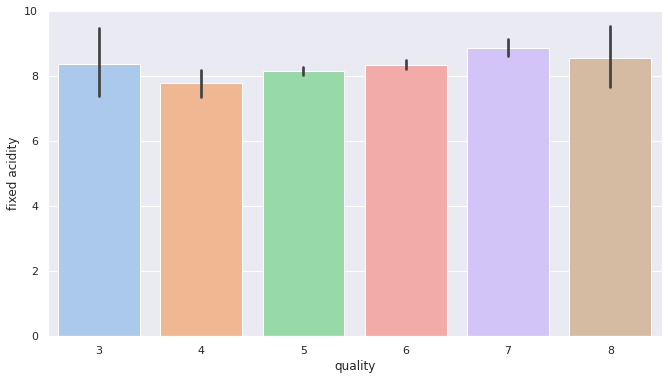

In [54]:
fig = plt.figure(figsize = (11,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = data)

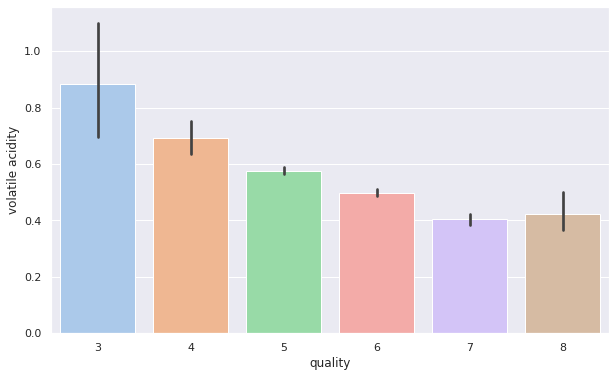

In [49]:
#when quality of wine goes up, volatile acidity likely goes down
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = data)

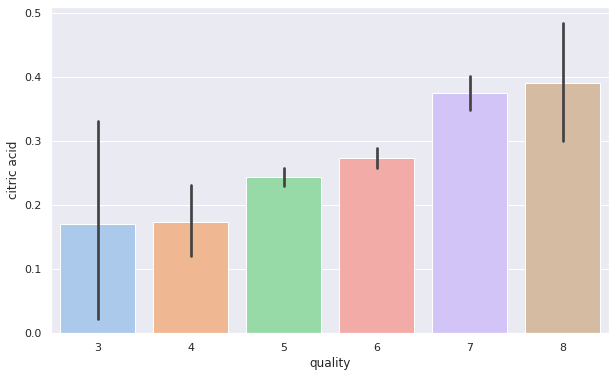

In [50]:
#instead, with more quality wines you get higher values of citric acid
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = data)

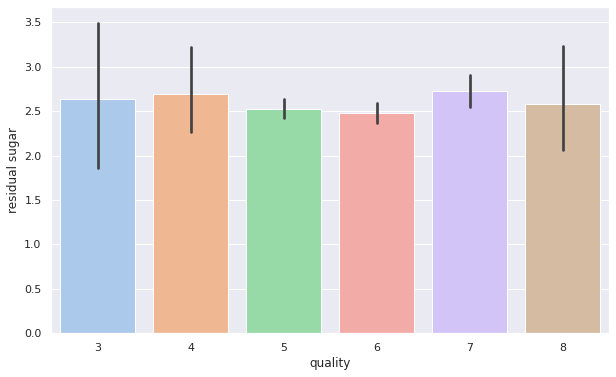

In [51]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = data)

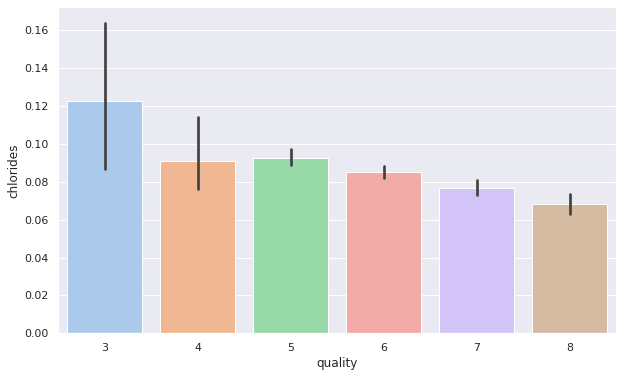

In [52]:
#chlorides is lower in more quality wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = data)

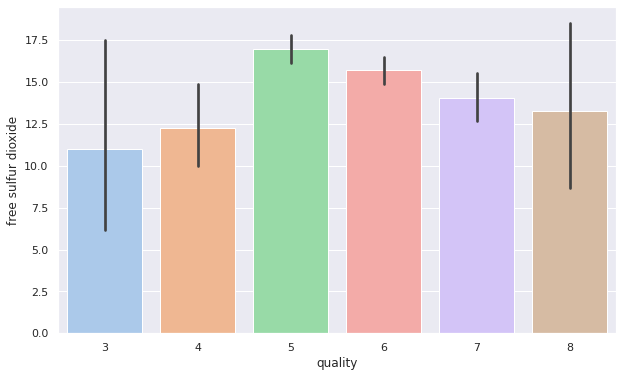

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = data)

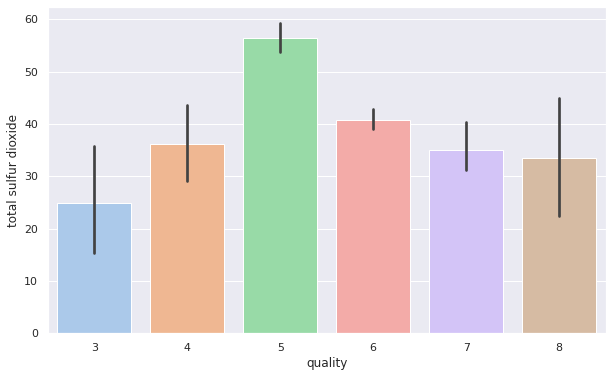

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = data)

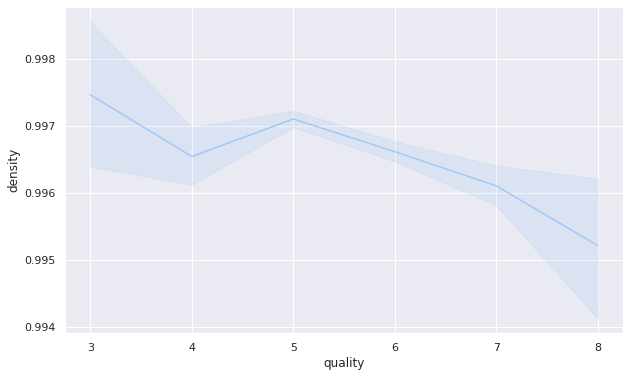

In [14]:
# I have chosen this kind of plot, 
# because in this case in barplot it was impossible to understand anything
fig = plt.figure(figsize = (10,6))
sns.lineplot(x = 'quality', y = 'density', data = data)

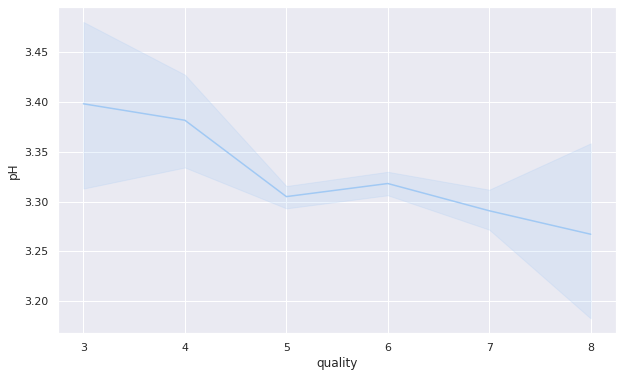

In [16]:
# same here
# I see a bit of downhill trend
fig = plt.figure(figsize = (10,6))
sns.lineplot(x = 'quality', y = 'pH', data = data)

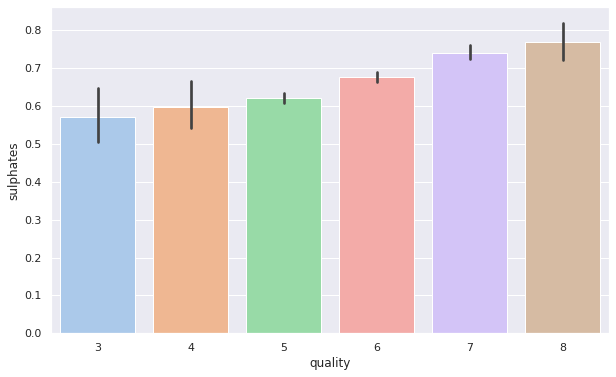

In [17]:
# the more the merrier for the sulphates
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = data)

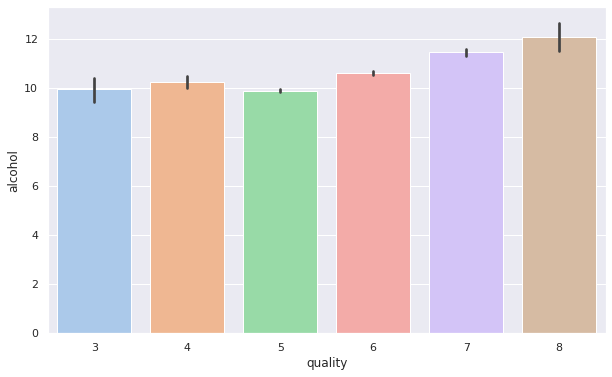

In [18]:
# for the alcohol I can see uphill trend (which is a surprise for me tbh)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = data)

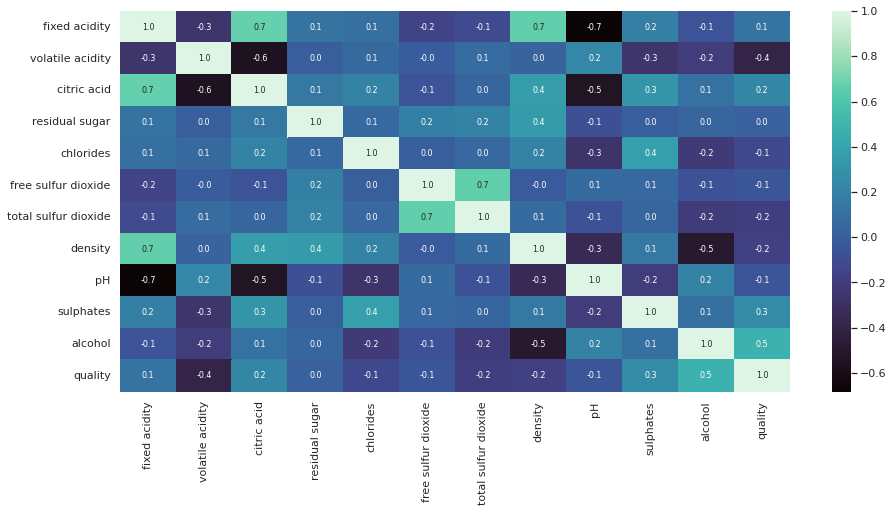

In [32]:
# plot a heatmap to see correlation
correlation = data.corr()
plt.figure(figsize = (15,7))
sns.heatmap(correlation,cbar =True,fmt = '0.01f',annot = True, annot_kws = {'size':8 }, cmap='mako')

### Cross validation

In [20]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [67]:
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']].values

In [68]:
y = np.array(data['quality'])

In [69]:
xval = sklearn.model_selection.KFold(n_splits=3, shuffle=True, random_state=7)
for train, test in xval.split(X):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1066, 11), (533, 11), (1066,), (533,))

### Training the models

To be honest, at first I thought this is regression task. But then I realized there are only six types of wine quality. So it will be classification models.

In [7]:
model_1 = sklearn.linear_model.SGDClassifier()

In [8]:
model_1.fit(X_train, y_train)

SGDClassifier()

In [9]:
y_predicted_1 = model_1.predict(X_test)

In [11]:
from sklearn.ensemble import RandomForestClassifier
#let's see also this model because desicion trees work good

In [70]:
# now I only choose to state max_depth because this is a way to stop Forest/Tree to overfit
model_2 = RandomForestClassifier(max_depth=10)

In [71]:
model_2.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [73]:
y_predicted_2 = model_2.predict(X_test)

### Evaluate models

In [16]:
metrics.f1_score(y_predicted_1, y_test, average='macro')

0.18145283591143466

In [74]:
metrics.f1_score(y_predicted_2, y_test, average='macro')

0.323564503297528

### Trying to get better result

I think if we only take those variables that have some trends (like alcohol) it can be better.

In [33]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [75]:
data_new = data.loc[:, ['volatile acidity', 'citric acid', 'total sulfur dioxide', 
                        'density', 'sulphates', 'alcohol', 'quality']].copy()

In [76]:
X = data_new[['volatile acidity', 'citric acid', 'total sulfur dioxide', 
                        'density', 'sulphates', 'alcohol']].values

In [77]:
y = np.array(data_new['quality'])

In [78]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

In [79]:
model_1.fit(X_train, y_train)
y_predicted_1 = model_1.predict(X_test)

In [80]:
model_2.fit(X_train, y_train)
y_predicted_2 = model_2.predict(X_test)

In [81]:
# here I do not see much of improvement
metrics.f1_score(y_predicted_1, y_test, average='macro')

0.16215298482740342

In [82]:
# here I see some improvement
metrics.f1_score(y_predicted_2, y_test, average='macro')

0.34531398738230323

Let's try to tune some hypermarameters.

In [90]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [100, 120, 150],
    'max_depth': [7, 10, 12, 15],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [5, 10, 15]
}

In [91]:
model_grid = RandomForestClassifier()

In [92]:

grad_rf = GridSearchCV(model_grid, parameters, refit=True, cv=10)
grad_rf.fit(X_train, y_train)

print('Best Score: ', grad_rf.best_score_*100, '\nBest Parameters: ', grad_rf.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  UserWarning,


Best Score:  63.25910433070866 
Best Parameters:  {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 150}


In [93]:
# parameters chosen from GridSearch
model_3 = RandomForestClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=150)

In [94]:
model_3.fit(X_train, y_train)
y_predicted_3 = model_3.predict(X_test)

In [95]:
# well, it is not much of improvement.
metrics.f1_score(y_predicted_3, y_test, average='macro')

0.3203006339631895

Let's try tune penalty of SGDClassifier.

In [103]:
# We saw that some features have more correlation than others
# So I choose l1 penalty
model_4 = sklearn.linear_model.SGDClassifier(penalty='l1')

In [104]:
model_4.fit(X_train, y_train)
y_predicted_4 = model_4.predict(X_test)

In [105]:
# this is an improvement of what we had early with this model
metrics.f1_score(y_predicted_4, y_test, average='macro')

0.23269178701551207

### Suggestions for the next steps

Considering the fact that the best score for F1 is 1, I think the models are not good enough.
Given more time, I would look more closely to the data, maybe trying to find some outliers or things I should to preprocess or normalize.
I would also try more models and find best parameters.